# Homework 5

#### Sitong Ju
#### USC ID: 8791155953
#### email: sitongju@usc.edu

In [52]:
import urllib.request
import zipfile
import pandas as pd
import numpy as np
from sklearn.metrics import f1_score, precision_score
import random
import math
from sklearn.metrics import hamming_loss
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings("ignore")

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score


### 1(a) Download the Anuran Calls (MFCCs) Data Set. Choose 70% of the data randomly as the training set.

In [2]:
mfcc_path = "../data/Frogs_MFCCs.csv"
mfcc = pd.read_csv(mfcc_path)

In [3]:
mfcc

,MFCCs_ 1,MFCCs_ 2,MFCCs_ 3,MFCCs_ 4,MFCCs_ 5,MFCCs_ 6,MFCCs_ 7,MFCCs_ 8,MFCCs_ 9,MFCCs_10,...,MFCCs_17,MFCCs_18,MFCCs_19,MFCCs_20,MFCCs_21,MFCCs_22,Family,Genus,Species,RecordID
0,1.0,0.152936,-0.105586,0.200722,0.317201,0.260764,0.100945,-0.150063,-0.171128,0.124676,...,-0.108351,-0.077623,-0.009568,0.057684,0.118680,0.014038,Leptodactylidae,Adenomera,AdenomeraAndre,1
1,1.0,0.171534,-0.098975,0.268425,0.338672,0.268353,0.060835,-0.222475,-0.207693,0.170883,...,-0.090974,-0.056510,-0.035303,0.020140,0.082263,0.029056,Leptodactylidae,Adenomera,AdenomeraAndre,1
2,1.0,0.152317,-0.082973,0.287128,0.276014,0.189867,0.008714,-0.242234,-0.219153,0.232538,...,-0.050691,-0.023590,-0.066722,-0.025083,0.099108,0.077162,Leptodactylidae,Adenomera,AdenomeraAndre,1
3,1.0,0.224392,0.118985,0.329432,0.372088,0.361005,0.015501,-0.194347,-0.098181,0.270375,...,-0.136009,-0.177037,-0.130498,-0.054766,-0.018691,0.023954,Leptodactylidae,Adenomera,AdenomeraAndre,1
4,1.0,0.087817,-0.068345,0.306967,0.330923,0.249144,0.006884,-0.265423,-0.172700,0.266434,...,-0.048885,-0.053074,-0.088550,-0.031346,0.108610,0.079244,Leptodactylidae,Adenomera,AdenomeraAndre,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7190,1.0,-0.554504,-0.337717,0.035533,0.034511,0.443451,0.093889,-0.100753,0.037087,0.081075,...,0.069430,0.071001,0.021591,0.052449,-0.021860,-0.079860,Hylidae,Scinax,ScinaxRuber,60
7191,1.0,-0.517273,-0.370574,0.030673,0.068097,0.402890,0.096628,-0.116460,0.063727,0.089034,...,0.061127,0.068978,0.017745,0.046461,-0.015418,-0.101892,Hylidae,Scinax,ScinaxRuber,60
7192,1.0,-0.582557,-0.343237,0.029468,0.064179,0.385596,0.114905,-0.103317,0.070370,0.081317,...,0.082474,0.077771,-0.009688,0.027834,-0.000531,-0.080425,Hylidae,Scinax,ScinaxRuber,60
7193,1.0,-0.519497,-0.307553,-0.004922,0.072865,0.377131,0.086866,-0.115799,0.056979,0.089316,...,0.051796,0.069073,0.017963,0.041803,-0.027911,-0.096895,Hylidae,Scinax,ScinaxRuber,60


In [4]:
mfccX = mfcc.iloc[:,:-4]
mfcc_f = mfcc.Family
mfcc_g = mfcc.Genus
mfcc_s = mfcc.Species

In [5]:
mfcc_f.value_counts()

Leptodactylidae    4420
Hylidae            2165
Dendrobatidae       542
Bufonidae            68
Name: Family, dtype: int64

In [6]:
mfcc_g.value_counts()

Adenomera        4150
Hypsiboas        1593
Ameerega          542
Dendropsophus     310
Leptodactylus     270
Scinax            148
Osteocephalus     114
Rhinella           68
Name: Genus, dtype: int64

In [7]:
mfcc_s.value_counts()

AdenomeraHylaedactylus    3478
HypsiboasCordobae         1121
AdenomeraAndre             672
Ameeregatrivittata         542
HypsiboasCinerascens       472
HylaMinuta                 310
LeptodactylusFuscus        270
ScinaxRuber                148
OsteocephalusOophagus      114
Rhinellagranulosa           68
Name: Species, dtype: int64

In [8]:
#Factorize the Labels
mfcc['Family'], f_labels = pd.factorize(mfcc_f)
mfcc['Genus'], g_labels = pd.factorize(mfcc_g)
mfcc['Species'], s_labels = pd.factorize(mfcc_s)

In [9]:
#Split dataset: 70% for training
num_row = len(mfcc)
random.seed(num_row)
train_idx = random.sample(range(num_row), int(num_row * 0.7))
test_idx = [i for i in range(num_row) if i not in train_idx]

mfcc_train = mfcc.iloc[train_idx, :].reset_index(drop=True)
mfcc_test = mfcc.iloc[test_idx, :].reset_index(drop=True)

train_X = mfcc_train.iloc[:, :-4]
trainFamily = mfcc_train.iloc[:, -4]
trainGenus = mfcc_train.iloc[:, -3]
trainSpecies = mfcc_train.iloc[:, -2]

test_X = mfcc_test.iloc[:, :-4]
testFamily = mfcc_test.iloc[:, -4]
testGenus = mfcc_test.iloc[:, -3]
testSpecies = mfcc_test.iloc[:, -2]

### 1(b) Each instance has three labels: Families, Genus, and Species. Each of the labels has multiple classes. We wish to solve a multi-class and multi-label problem. One of the most important approaches to multi-label classification is to train a classifier for each label (binary relevance). We first try this approach:

#### 1(b)i. Research exact match and hamming score/ loss methods for evaluating multi- label classification and use them in evaluating the classifiers in this problem.

Exact Match Ratio: every label of a sample must be exactly the same as its in data set.
<br> Hamming Loss: the fraction of the wrong labels to the total number of labels

In [10]:
def multilabel_eval(title, testX, groundTruth_Y, classifiers):
    pred_Y = pd.DataFrame(columns = groundTruth_Y.columns)
    for label in groundTruth_Y.columns:
        clf = classifiers[label]
        test_pred = clf.predict(testX)
        pred_Y.loc[:, label] = test_pred
    print("Multilabel evaluation of {}".format(title))
    print("-" * 80)
    
    missclf_labels = 0
    for truth, pred in zip(groundTruth_Y.values, pred_Y.values):
        miss = (truth != pred)
        missclf_labels += np.sum(miss)
    hamming = missclf_labels / (groundTruth_Y.shape[0] * groundTruth_Y.shape[1])
    
    exact_ratio = 0
    for truth, pred in zip(groundTruth_Y.values, pred_Y.values):
        match = (truth == pred)
        if sum(match) == groundTruth_Y.shape[1]:
            exact_ratio += 1;
    exact_ratio /= groundTruth_Y.shape[0]
    
    hamming = np.round(hamming, 4)
    exact_ratio = np.round(exact_ratio, 4)
    print("Hamming Loss : {}".format(hamming))
    print("Exact Match Ratio : {}".format(exact_ratio))
    
    return [hamming, exact_ratio]
    

#### ii. Train a SVM for each of the labels, using Gaussian kernels and one versus all classifiers. Determine the weight of the SVM penalty and the width of the Gaussian Kernel using 10 fold cross validation.1 You are welcome to try to solve the problem with both standardized 2 and raw attributes and report the results.

In [11]:
def search_param(classifier, settings, trainX, trainY, testX, testY):
    clf = GridSearchCV(estimator=classifier, **settings)
    clf.fit(trainX, trainY)
    
    print("Grid scores on development set:\n")
    means = clf.cv_results_['mean_test_score']
    stds = clf.cv_results_['std_test_score']
    for mean, std, params in zip(means, stds, clf.cv_results_['params']):
        print("%0.3f (+/-%0.03f) for %r"
              % (mean, std * 2, params))
    
    print("\nThe best parameter setting is:")
    print(clf.best_params_, "\n")
    test_pred = clf.predict(testX)
    print(classification_report(testY, test_pred))
    
    return clf


In [12]:
# Gaussian SVC without standardization

gaussianSVC_classifiers = {} # dict for classifiers

tuned_params = {'C' : np.logspace(1, 4, 4), 
                'gamma' : np.logspace(-3, 6, 10)}

# create a data splitter for cross-validation
splitter = StratifiedKFold(10, random_state=5036, shuffle=True)

In [13]:
settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

# Family, no standardization
gaussianSVC_classifiers['Family'] = search_param(SVC(kernel='rbf'), settings, train_X, trainFamily, test_X, testFamily)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.827 (+/-0.026) for {'C': 10.0, 'gamma': 0.001}
0.930 (+/-0.016) for {'C': 10.0, 'gamma': 0.01}
0.971 (+/-0.012) for {'C': 10.0, 'gamma': 0.1}
0.991 (+/-0.007) for {'C': 10.0, 'gamma': 1.0}
0.986 (+/-0.010) for {'C': 10.0, 'gamma': 10.0}
0.791 (+/-0.040) for {'C': 10.0, 'gamma': 100.0}
0.492 (+/-0.021) for {'C': 10.0, 'gamma': 1000.0}
0.472 (+/-0.005) for {'C': 10.0, 'gamma': 10000.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.930 (+/-0.016) for {'C': 100.0, 'gamma': 0.001}
0.941 (+/-0.020) for {'C': 100.0, 'gamma': 0.01}
0.983 (+/-0.007) for {'C': 100.0, 'gamma': 0.1}
0.992 (+/-0.007) for {'C': 100.0, 'gamma': 1.0}
0.986 (+/-0.010) for {'C': 100.0, 'gamma': 10.0}
0.791 (+/-0.040) for {'C': 100.0, 'gamma': 100.0}
0.492 (+/-0.021) for {'C': 100.0, 'gamma': 1000.0}
0.472 (+/-0.005) for {'C': 100.0, 'gamma': 10000.0}
0.470 (+/-0.0

In [14]:
# Genus, no standardization
gaussianSVC_classifiers['Genus'] = search_param(SVC(kernel='rbf'), settings, train_X, trainGenus, test_X, testGenus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.744 (+/-0.026) for {'C': 10.0, 'gamma': 0.001}
0.920 (+/-0.019) for {'C': 10.0, 'gamma': 0.01}
0.973 (+/-0.014) for {'C': 10.0, 'gamma': 0.1}
0.988 (+/-0.009) for {'C': 10.0, 'gamma': 1.0}
0.980 (+/-0.011) for {'C': 10.0, 'gamma': 10.0}
0.733 (+/-0.042) for {'C': 10.0, 'gamma': 100.0}
0.442 (+/-0.014) for {'C': 10.0, 'gamma': 1000.0}
0.425 (+/-0.004) for {'C': 10.0, 'gamma': 10000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.919 (+/-0.017) for {'C': 100.0, 'gamma': 0.001}
0.965 (+/-0.016) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.989 (+/-0.007) for {'C': 100.0, 'gamma': 1.0}
0.980 (+/-0.011) for {'C': 100.0, 'gamma': 10.0}
0.733 (+/-0.042) for {'C': 100.0, 'gamma': 100.0}
0.442 (+/-0.014) for {'C': 100.0, 'gamma': 1000.0}
0.425 (+/-0.004) for {'C': 100.0, 'gamma': 10000.0}
0.423 (+/-0.0

In [15]:
# Species, no standardization
gaussianSVC_classifiers['Species'] = search_param(SVC(kernel='rbf'), settings, train_X, trainSpecies, test_X, testSpecies)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.800 (+/-0.015) for {'C': 10.0, 'gamma': 0.001}
0.935 (+/-0.021) for {'C': 10.0, 'gamma': 0.01}
0.974 (+/-0.017) for {'C': 10.0, 'gamma': 0.1}
0.988 (+/-0.011) for {'C': 10.0, 'gamma': 1.0}
0.978 (+/-0.010) for {'C': 10.0, 'gamma': 10.0}
0.656 (+/-0.040) for {'C': 10.0, 'gamma': 100.0}
0.330 (+/-0.015) for {'C': 10.0, 'gamma': 1000.0}
0.314 (+/-0.005) for {'C': 10.0, 'gamma': 10000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.935 (+/-0.021) for {'C': 100.0, 'gamma': 0.001}
0.970 (+/-0.018) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.019) for {'C': 100.0, 'gamma': 0.1}
0.988 (+/-0.011) for {'C': 100.0, 'gamma': 1.0}
0.978 (+/-0.010) for {'C': 100.0, 'gamma': 10.0}
0.656 (+/-0.040) for {'C': 100.0, 'gamma': 100.0}
0.330 (+/-0.015) for {'C': 100.0, 'gamma': 1000.0}
0.314 (+/-0.005) for {'C': 100.0, 'gamma': 10000.0}
0.312 (+/-0.0

In [16]:
GaussianSVC_no_std = multilabel_eval('Gaussian Kernel SVC without Standarization', test_X, mfcc_test.iloc[:, -4:-1], 
                                                        gaussianSVC_classifiers)
GaussianSVC_no_std

Multilabel evaluation of Gaussian Kernel SVC without Standarization
--------------------------------------------------------------------------------
Hamming Loss : 0.0096
Exact Match Ratio : 0.9852


[0.0096, 0.9852]

In [17]:
#Gaussian SVC with standardization
std_scaler = StandardScaler()
std_train_X = std_scaler.fit_transform(train_X)
std_test_X = std_scaler.fit_transform(test_X)

In [18]:
# Family, with standardization
gaussianSVC_classifiers['Family'] = search_param(SVC(kernel='rbf'), settings, std_train_X, trainFamily
                                                     , std_test_X, testFamily)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.945 (+/-0.021) for {'C': 10.0, 'gamma': 0.001}
0.988 (+/-0.005) for {'C': 10.0, 'gamma': 0.01}
0.990 (+/-0.007) for {'C': 10.0, 'gamma': 0.1}
0.905 (+/-0.023) for {'C': 10.0, 'gamma': 1.0}
0.575 (+/-0.047) for {'C': 10.0, 'gamma': 10.0}
0.473 (+/-0.004) for {'C': 10.0, 'gamma': 100.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 1000.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 10000.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 100000.0}
0.470 (+/-0.002) for {'C': 10.0, 'gamma': 1000000.0}
0.976 (+/-0.011) for {'C': 100.0, 'gamma': 0.001}
0.989 (+/-0.006) for {'C': 100.0, 'gamma': 0.01}
0.990 (+/-0.007) for {'C': 100.0, 'gamma': 0.1}
0.905 (+/-0.023) for {'C': 100.0, 'gamma': 1.0}
0.575 (+/-0.047) for {'C': 100.0, 'gamma': 10.0}
0.473 (+/-0.004) for {'C': 100.0, 'gamma': 100.0}
0.470 (+/-0.002) for {'C': 100.0, 'gamma': 1000.0}
0.470 (+/-0.002) for {'C': 100.0, 'gamma': 10000.0}
0.470 (+/-0.0

In [19]:
# Genus, with standardization
gaussianSVC_classifiers['Genus'] = search_param(SVC(kernel='rbf'), settings, std_train_X, trainGenus, 
                                               std_test_X, testGenus)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.958 (+/-0.018) for {'C': 10.0, 'gamma': 0.001}
0.986 (+/-0.008) for {'C': 10.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 10.0, 'gamma': 0.1}
0.857 (+/-0.020) for {'C': 10.0, 'gamma': 1.0}
0.513 (+/-0.018) for {'C': 10.0, 'gamma': 10.0}
0.426 (+/-0.006) for {'C': 10.0, 'gamma': 100.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 10000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.423 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.977 (+/-0.013) for {'C': 100.0, 'gamma': 0.001}
0.988 (+/-0.008) for {'C': 100.0, 'gamma': 0.01}
0.987 (+/-0.009) for {'C': 100.0, 'gamma': 0.1}
0.857 (+/-0.020) for {'C': 100.0, 'gamma': 1.0}
0.513 (+/-0.018) for {'C': 100.0, 'gamma': 10.0}
0.426 (+/-0.006) for {'C': 100.0, 'gamma': 100.0}
0.423 (+/-0.001) for {'C': 100.0, 'gamma': 1000.0}
0.423 (+/-0.001) for {'C': 100.0, 'gamma': 10000.0}
0.423 (+/-0.0

In [20]:
# Species, with standardization
gaussianSVC_classifiers['Species'] = search_param(SVC(kernel='rbf'), settings, std_train_X, trainSpecies, 
                                                 std_test_X, testSpecies)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
Grid scores on development set:

0.967 (+/-0.018) for {'C': 10.0, 'gamma': 0.001}
0.987 (+/-0.013) for {'C': 10.0, 'gamma': 0.01}
0.985 (+/-0.008) for {'C': 10.0, 'gamma': 0.1}
0.835 (+/-0.024) for {'C': 10.0, 'gamma': 1.0}
0.389 (+/-0.026) for {'C': 10.0, 'gamma': 10.0}
0.315 (+/-0.006) for {'C': 10.0, 'gamma': 100.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 10000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 100000.0}
0.312 (+/-0.001) for {'C': 10.0, 'gamma': 1000000.0}
0.980 (+/-0.014) for {'C': 100.0, 'gamma': 0.001}
0.987 (+/-0.012) for {'C': 100.0, 'gamma': 0.01}
0.985 (+/-0.008) for {'C': 100.0, 'gamma': 0.1}
0.835 (+/-0.024) for {'C': 100.0, 'gamma': 1.0}
0.389 (+/-0.026) for {'C': 100.0, 'gamma': 10.0}
0.315 (+/-0.006) for {'C': 100.0, 'gamma': 100.0}
0.312 (+/-0.001) for {'C': 100.0, 'gamma': 1000.0}
0.312 (+/-0.001) for {'C': 100.0, 'gamma': 10000.0}
0.312 (+/-0.0

In [29]:
GaussianSVC_with_std = multilabel_eval('Gaussian Kernel SVC with Standarization', std_test_X, mfcc_test.iloc[:, -4:-1], 
                                                         gaussianSVC_classifiers)
GaussianSVC_with_std

Multilabel evaluation of Gaussian Kernel SVC with Standarization
--------------------------------------------------------------------------------
Hamming Loss : 0.0117
Exact Match Ratio : 0.9787


[0.0117, 0.9787]

#### 1(b)iii. Repeat 1(b)ii with L1-penalized SVMs.3 Remember to standardize4 the at- tributes. Determine the weight of the SVM penalty using 10 fold cross vali- dation.

In [23]:
tuned_params = {'C' : np.logspace(1, 5, 10)}

L1_settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

L1_svm_classifiers = {}

In [24]:
# Family, with standardization
L1_svm_classifiers['Family'] = search_param(LinearSVC(penalty='l1', dual=False), L1_settings,
                                           std_train_X, trainFamily, std_test_X, testFamily)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Grid scores on development set:

0.928 (+/-0.026) for {'C': 10.0}
0.928 (+/-0.027) for {'C': 27.825594022071243}
0.928 (+/-0.027) for {'C': 77.4263682681127}
0.928 (+/-0.027) for {'C': 215.44346900318823}
0.928 (+/-0.027) for {'C': 599.4842503189409}
0.928 (+/-0.027) for {'C': 1668.100537200059}
0.928 (+/-0.027) for {'C': 4641.588833612777}
0.928 (+/-0.027) for {'C': 12915.496650148827}
0.928 (+/-0.027) for {'C': 35938.13663804626}
0.928 (+/-0.027) for {'C': 100000.0}

The best parameter setting is:
{'C': 10.0} 

              precision    recall  f1-score   support

           0       0.95      0.98      0.96      1317
           1       0.88      0.92      0.90       154
           2       0.94      0.90      0.92       673
           3       0.00      0.00      0.00        15

    accuracy                           0.94      2159
   macro avg       0.69      0.70      0.70      2159
weighted avg       0.94      0.94      0.94      2159



/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [25]:
# Genus, with standardization
L1_svm_classifiers['Genus'] = search_param(LinearSVC(penalty='l1', dual=False), L1_settings,
                                          std_train_X, trainGenus, std_test_X, testGenus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Grid scores on development set:

0.948 (+/-0.012) for {'C': 10.0}
0.948 (+/-0.013) for {'C': 27.825594022071243}
0.948 (+/-0.012) for {'C': 77.4263682681127}
0.948 (+/-0.013) for {'C': 215.44346900318823}
0.947 (+/-0.012) for {'C': 599.4842503189409}
0.947 (+/-0.012) for {'C': 1668.100537200059}
0.947 (+/-0.012) for {'C': 4641.588833612777}
0.947 (+/-0.012) for {'C': 12915.496650148827}
0.947 (+/-0.012) for {'C': 35938.13663804626}
0.947 (+/-0.012) for {'C': 100000.0}

The best parameter setting is:
{'C': 77.4263682681127} 

              precision    recall  f1-score   support

           0       0.96      0.99      0.98      1240
           1       0.92      0.95      0.93       154
           2       0.92      0.67      0.78        91
           3       0.92      0.98      0.95       479
           4       0.97      0.90      0.93        77
           5       1.00      0.36      0.53        47
           6       0.91      0.67      0.77        15
           7       0.95      0.93   

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [26]:
# Species, with standardization
L1_svm_classifiers['Species'] = search_param(LinearSVC(penalty='l1', dual=False), L1_settings,
                                            std_train_X, trainSpecies, std_test_X, testSpecies)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

Grid scores on development set:

0.958 (+/-0.021) for {'C': 10.0}
0.959 (+/-0.021) for {'C': 27.825594022071243}
0.959 (+/-0.021) for {'C': 77.4263682681127}
0.959 (+/-0.021) for {'C': 215.44346900318823}
0.959 (+/-0.022) for {'C': 599.4842503189409}
0.959 (+/-0.022) for {'C': 1668.100537200059}
0.959 (+/-0.022) for {'C': 4641.588833612777}
0.959 (+/-0.021) for {'C': 12915.496650148827}
0.959 (+/-0.022) for {'C': 35938.13663804626}
0.959 (+/-0.022) for {'C': 100000.0}

The best parameter setting is:
{'C': 599.4842503189409} 

              precision    recall  f1-score   support

           0       0.88      0.94      0.91       182
           1       0.94      0.94      0.94       154
           2       0.99      1.00      0.99      1058
           3       0.92      0.71      0.80        91
           4       0.92      0.94      0.93       153
           5       0.92      0.96      0.94       326
           6       0.97      0.91      0.94        77
           7       1.00      0.49  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [27]:
SVC_L1 = multilabel_eval('SVM with L1 penalty', std_test_X, mfcc_test.iloc[:, -4:-1], 
                                              L1_svm_classifiers)
SVC_L1 

Multilabel evaluation of SVM with L1 penalty
--------------------------------------------------------------------------------
Hamming Loss : 0.0522
Exact Match Ratio : 0.9143


[0.0522, 0.9143]

#### 1(b)iv. Repeat 1(b)iii by using SMOTE or any other method you know to remedy class imbalance. Report your conclusions about the classifiers you trained.


In [32]:
def smote_search(classifier, settings, trainX, trainY, testX, testY):
    naive_model = Pipeline([
        ('sampling', SMOTE()),
        ('classification', classifier)
    ])
    selected_model = search_param(naive_model, settings,
                                 trainX, trainY, 
                                 testX, testY)
    return selected_model

In [33]:
tuned_params = {'classification__C' : np.logspace(1, 5, 10)}

smote_settings = {
    'param_grid' : tuned_params, 
    'cv' : splitter,
    'scoring' : 'f1_weighted', 
    'verbose' : 1
}

smote_svc_classifiers = {}

In [37]:
# Family, with standardization, L1 penalty and SMOTE
smote_svc_classifiers['Family'] = smote_search(LinearSVC(penalty='l1', dual=False), smote_settings,
                                                   std_train_X, trainFamily, std_test_X, testFamily)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.921 (+/-0.025) for {'classification__C': 10.0}
0.921 (+/-0.023) for {'classification__C': 27.825594022071243}
0.921 (+/-0.024) for {'classification__C': 77.4263682681127}
0.922 (+/-0.026) for {'classification__C': 215.44346900318823}
0.921 (+/-0.028) for {'classification__C': 599.4842503189409}
0.921 (+/-0.026) for {'classification__C': 1668.100537200059}
0.921 (+/-0.028) for {'classification__C': 4641.588833612777}
0.919 (+/-0.029) for {'classification__C': 12915.496650148827}
0.921 (+/-0.023) for {'classification__C': 35938.13663804626}
0.922 (+/-0.023) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 100000.0} 

              precision    recall  f1-score   support

           0       0.96      0.95      0.95      1317
           1       0.77      0.98      0.87       154
           2       0.95      0.86      0.90       673
           3       0.

In [38]:
# Genus, with standardization, L1 penalty and SMOTE
smote_svc_classifiers['Genus'] = smote_search(LinearSVC(penalty='l1', dual=False), smote_settings,
                                                  std_train_X, trainGenus, std_test_X, testGenus)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.919 (+/-0.023) for {'classification__C': 10.0}
0.919 (+/-0.022) for {'classification__C': 27.825594022071243}
0.918 (+/-0.022) for {'classification__C': 77.4263682681127}
0.918 (+/-0.023) for {'classification__C': 215.44346900318823}
0.918 (+/-0.023) for {'classification__C': 599.4842503189409}
0.919 (+/-0.023) for {'classification__C': 1668.100537200059}
0.918 (+/-0.025) for {'classification__C': 4641.588833612777}
0.919 (+/-0.026) for {'classification__C': 12915.496650148827}
0.917 (+/-0.024) for {'classification__C': 35938.13663804626}
0.918 (+/-0.023) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 27.825594022071243} 

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      1240
           1       0.82      0.92      0.87       154
           2       0.65      0.96      0.78        91
           

In [39]:
# Species, with standardization, L1 penalty and SMOTE
smote_svc_classifiers['Species'] = smote_search(LinearSVC(penalty='l1', dual=False), smote_settings,
                                                  std_train_X, trainSpecies, std_test_X, testSpecies)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Grid scores on development set:

0.956 (+/-0.018) for {'classification__C': 10.0}
0.957 (+/-0.017) for {'classification__C': 27.825594022071243}
0.956 (+/-0.018) for {'classification__C': 77.4263682681127}
0.956 (+/-0.018) for {'classification__C': 215.44346900318823}
0.955 (+/-0.016) for {'classification__C': 599.4842503189409}
0.955 (+/-0.018) for {'classification__C': 1668.100537200059}
0.957 (+/-0.017) for {'classification__C': 4641.588833612777}
0.957 (+/-0.016) for {'classification__C': 12915.496650148827}
0.956 (+/-0.015) for {'classification__C': 35938.13663804626}
0.957 (+/-0.017) for {'classification__C': 100000.0}

The best parameter setting is:
{'classification__C': 12915.496650148827} 

              precision    recall  f1-score   support

           0       0.97      0.94      0.95       182
           1       0.96      0.90      0.93       154
           2       0.99      1.00      0.99      1058
           

In [41]:
SVC_L1_SMOTE = multilabel_eval('SVM with L1 penalty and SMOTE', 
                                                    std_test_X, mfcc_test.iloc[:, -4:-1], smote_svc_classifiers)
SVC_L1_SMOTE

Multilabel evaluation of SVM with L1 penalty and SMOTE
--------------------------------------------------------------------------------
Hamming Loss : 0.071
Exact Match Ratio : 0.8569


[0.071, 0.8569]

Conclusion:
<br> GaussianSVC without standard deviation: hamming loss = 0.0096, exact match ratio = 0.9852
<br> GaussianSVC with standard deviation: hamming loss = 0.0117, exact match ratio = 0.9787
<br> L1-penalized SVM: hamming loss = 0.0522, exact match ratio = 0.9143
<br> L1-penalized SVM using SMOTE: hamming loss = 0.071, exact match ratio = 0.8569
In this Multi-class and Multi-label data set, comparing this three model based on exact match ratio and hamming loss, SVM with Gaussian kernel and OvR classifiers has an outstanding performance with exact match ratio = 0.9852 and hamming loss = 0.0096

### 2. K-Means Clustering on a Multi-Class and Multi-Label Data Set
### Monte-Carlo Simulation: Perform the following procedures 50 times, and report the average and standard deviation of the 50 Hamming Distances that you calculate.

### 2(a) Use k-means clustering on the whole Anuran Calls (MFCCs) Data Set (do not split the data into train and test, as we are not performing supervised learning in this exercise). Choose k ∈ {1, 2, . . . , 50} automatically based on one of the methods provided in the slides (CH or Gap Statistics or scree plots or Silhouettes) or any other method you know.

In [42]:
#funciton to find optimal K
def optimal_K(num_cluster, X, rand):
    optimal_K = 2
    max_score = 0
    for n in range(2, num_cluster + 1):
        clusterer = KMeans(n_clusters=n, random_state=rand)
        cluster_labels = clusterer.fit_predict(X)
        silhouette_avg = silhouette_score(X, cluster_labels)
        if silhouette_avg > max_score:
            optimal_K = n
            max_score = silhouette_avg
    print("\nThe optimal K is: {}".format(optimal_K))
    return optimal_K

### (b) In each cluster, determine which family is the majority by reading the true labels. Repeat for genus and species.

In [43]:
#function to get majority labels for each cluster
def get_Labels(optimal_K, cluster_labels, Y):
    cluster_major = pd.DataFrame(columns=Y.columns)
    for c in range(optimal_K):
        idx, = np.where(cluster_labels == c)
        cluster_samples = Y.iloc[idx, :]
        row = []
        for label in Y.columns:
            cur_major = cluster_samples.loc[:, label].value_counts().index[0]
            row.append(cur_major)
        cluster_major.loc[c] = row
    return cluster_major

In [44]:
# evaluation of Hamming Distance/Loss
def eval2(cluster_major, cluster_labels, Y):
    missclf_labels = 0
    for c in range(len(cluster_major)):
        idx, = np.where(cluster_labels == c)
        for label in Y.loc[idx].values:
            miss = (label != cluster_major.loc[c].values)
            missclf_labels += np.sum(miss)
    
    hamming_dist = missclf_labels / Y.shape[0]
    hamming_loss = missclf_labels / (Y.shape[0] * Y.shape[1])
    return hamming_dist, hamming_loss

In [50]:
# function perform Monte Carlo
def monteCarlo(times, X, Y):
    hamming_dist = []
    hamming_loss = []
    for i in range(times):
        optimalK = optimal_K(50, X, i)

        clusterer = KMeans(n_clusters=optimalK, random_state=i)
        cluster_labels = clusterer.fit_predict(X)
        
        cluster_major = get_Labels(optimalK, cluster_labels, Y)
        cluster_major = cluster_major.astype('int64')
        
        # get Hamming distance and Hamming loss
        cur_dist, cur_loss = eval2(cluster_major, cluster_labels, Y)
        hamming_dist.append(cur_dist)
        hamming_loss.append(cur_loss)
        print("Attempt {} ~ Hamming Distance : {}, Hamming Loss {}".format(i+1, cur_dist, cur_loss))
    return hamming_dist, hamming_loss

In [53]:
hamming_dist, hamming_loss = monteCarlo(50, mfcc.iloc[:, :-4], mfcc.iloc[:, -4:-1])


The optimal K is: 4
Attempt 1 ~ Hamming Distance : 0.6653231410701876, Hamming Loss 0.22177438035672922

The optimal K is: 4
Attempt 2 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 3 ~ Hamming Distance : 0.7357887421820709, Hamming Loss 0.24526291406069028

The optimal K is: 4
Attempt 4 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 5 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 6 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 7 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 8 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 9 ~ Hamming Distance : 0.66726893676164, Hamming Loss 0.2224229789205467

The optimal K is: 4
Attempt 10 ~ Hamming Distance : 0.66726893676164, Hammi

In [54]:
hamming_dist, hamming_loss = np.array(hamming_dist), np.array(hamming_loss)

The average Hamming Distance is 0.6711688672689367

In [55]:
np.mean(hamming_dist)

0.6711688672689367

The average Hamming Loss is 0.22372295575631226

In [57]:
np.mean(hamming_loss)

0.22372295575631226

The average Hamming Score is 0.7762770442436877

In [59]:
1 - np.mean(hamming_loss)

0.7762770442436877

### ISLR 12.6.2

### (a)(b)

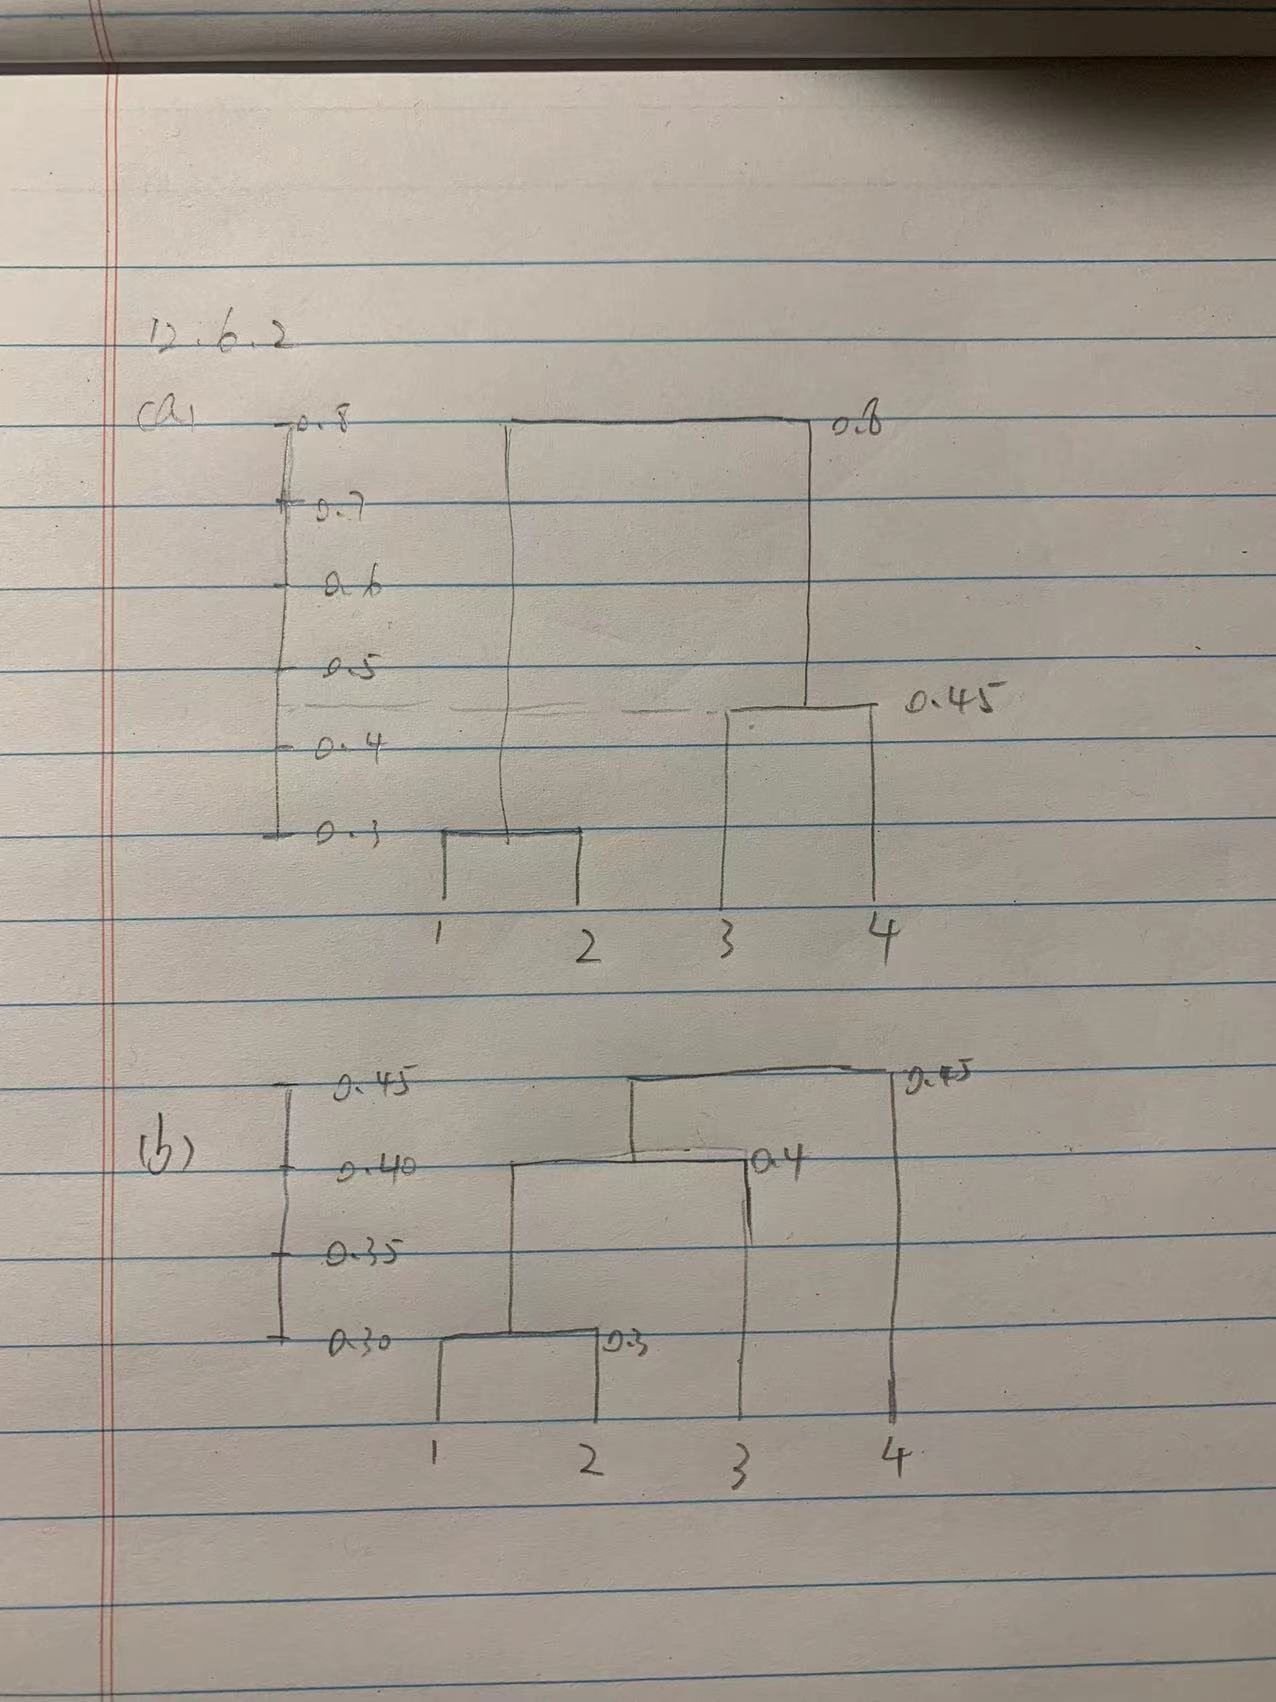

In [61]:
from IPython.display import Image
Image('ab.jpeg')

### (c) two clusters: {1, 2} and {3, 4}.
### (d) two clusters: {1, 2, 3} and {4}

### (e)

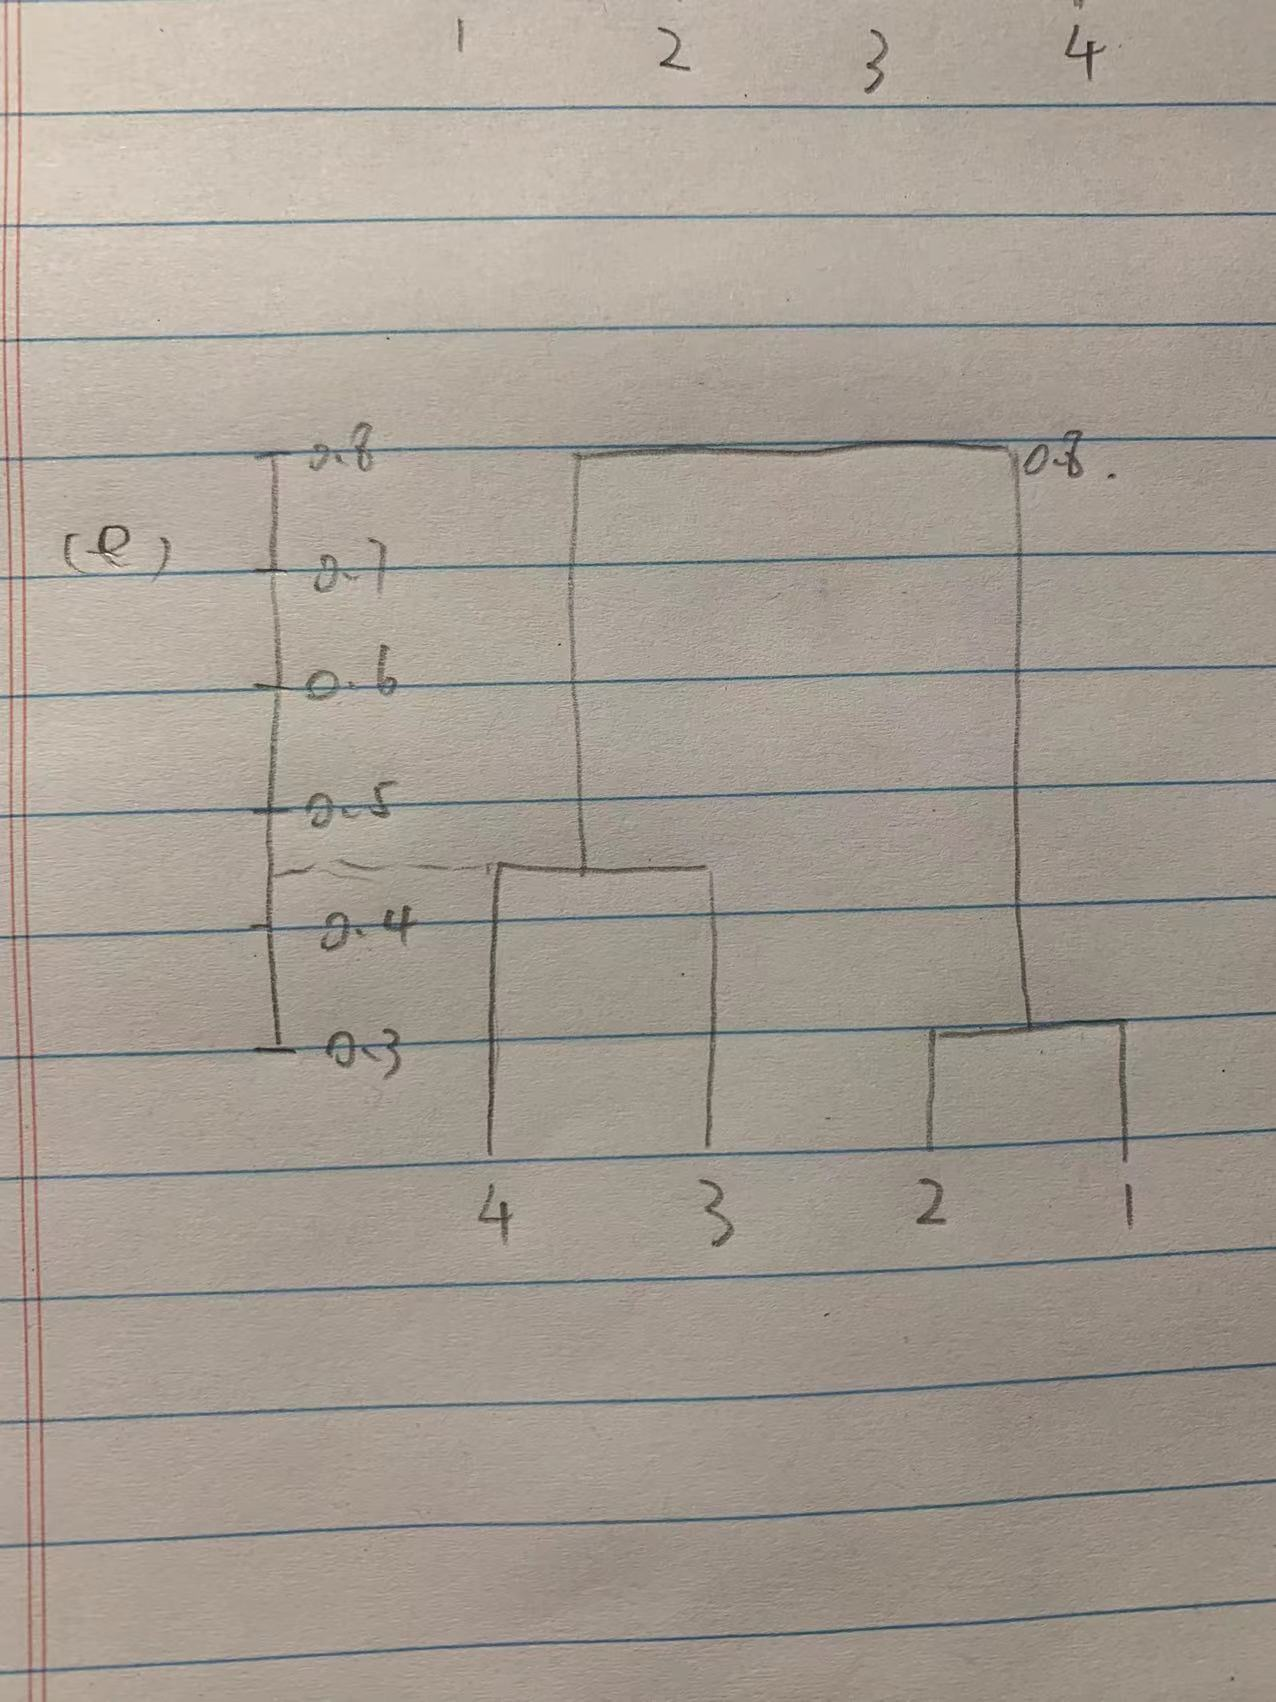

In [62]:
Image('e.jpeg')